### read required libraries

In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

## Read and optemize files

##### reading text data file

In [2]:
## open the file and read it 
with open("C:\\Users\\20812018100700\\working\\work\\rd_part\\result_full.txt", encoding='utf-8')as f:
    result = f.read()

In [3]:
## split .txt file 
result = re.split("done [0-9$,.%]+\d*\n", result)

##### reading orignal data frame

In [4]:
## read DataFrame
df = pd.read_csv("C:\\Users\\20812018100700\\working\\work\\rd_part\\test2_data.csv")

In [5]:
## drop null values
df = df[df["message"].notnull()]

In [6]:
## reset the index of DF
df.reset_index(drop=True, inplace=True)

In [7]:
## slice the DF to the len of our data
df = df.iloc[:len(result), :]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_time  15200 non-null  object
 1   message       15200 non-null  object
 2   id            15200 non-null  object
 3   from          91 non-null     object
dtypes: object(4)
memory usage: 475.1+ KB


### extract values from text file

In [8]:
## store values in dict 
data = {
        "Translate": [],
        "is_human" : [],
        "sentment" : [],
        "positive" : [], 
        "neutral"  : [],
        "negative" : []
        }

In [9]:
## loop for each value in result list extract is_human 
## if not human: will extract the Translation, Sentment overall rank, sentment score
## else the sentment is nutral/no translation
for i in range(len(result)): 
    iz = re.search('(?<=is human: )(.*)', result[i]).groups()[0]
    data["is_human"].append(iz[0])
    if (iz == "True"):
        data["sentment"].append("neutral")
        data["Translate"].append(result[i].split(" \n\n")[0])
        h = ['positive=0.00', 'neutral=1.00', 'negative=0.00 ']
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])        
                                   
    else:                          
        m = re.search('(?<=Document Sentiment: )(.*)', result[i]).groups()
        data["sentment"].append(m[0])
        
        n = re.search('(?<=Translate: )(.*)', result[i]).groups()
        data["Translate"].append(n[0])
        
        h = str(re.search('(?<=Overall scores: )(.*)', result[i]).groups()[0]).split("; ")
        for j in h:
            s = j.split("=")
            data[s[0]].append(s[1])
        

In [10]:
## convert dict to dataFrame
df1= pd.DataFrame(data)
df1.sample(10)

,Translate,is_human,sentment,positive,neutral,negative
1226,Self-assessment,F,neutral,0.02,0.82,0.16
10030,Mabroook 👏🏻👏🏻👏🏻,F,neutral,0.14,0.82,0.04
10202,"Mr. Abdul Azim, thanks God for his mercy and m...",F,negative,0.04,0.00,0.96
5151,Hagar Ahmed Hagar Hamdy 🤓,T,neutral,0.00,1.00,0.00
13582,The balance of faith,F,positive,0.76,0.24,0.00
4100,Rania Hatem,T,neutral,0.00,1.00,0.00
14590,when will the broadcast start,F,neutral,0.02,0.97,0.01
7674,Jan George,T,neutral,0.00,1.00,0.00
4456,Course name,F,neutral,0.06,0.91,0.03
13656,God bless you,F,positive,0.98,0.02,0.00


### merge the 2 dataframes to 1 df

In [11]:
## merge 2 dataFrames into the index
ndf = pd.merge(df, df1, left_index=True, right_index=True)
ndf.head(25)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
0,2021-08-30T18:45:14+0000,من فضلك عاوزة أسأل عن الكورس بتاع دكتور حنان ر...,1909076255920699_1909102692584722,NaN,"Please, I want to ask about dr. Hanan Radwan's...",F,neutral,0.05,0.92,0.03
1,2021-08-26T18:14:24+0000,ممكن معلومات عن المسابقة,1905738672921124_1905795872915404,NaN,Can I get information about the contest?,F,neutral,0.01,0.98,0.01
2,2021-08-28T21:14:33+0000,مبروووك,1905738672921124_1907514736076851,NaN,Congratulations,F,positive,0.57,0.39,0.04
3,2021-08-27T20:36:52+0000,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,NaN,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00
4,2021-08-27T19:32:24+0000,ممكن تفاصيل,1905738672921124_1906660966162228,NaN,Can I have details,F,neutral,0.01,0.98,0.01
5,2021-08-26T17:05:00+0000,حاجة عظيمة,1905738672921124_1905753419586316,NaN,Great thing,F,positive,1.00,0.00,0.00
6,2021-08-26T03:14:07+0000,Dania Xina Mahariq,1905016969659961_1905233889638269,NaN,Dania Xina Mahariq,T,neutral,0.00,1.00,0.00
7,2021-08-27T00:40:48+0000,Sara Yassin,1905016969659961_1905994712895520,NaN,Sara Yassin,T,neutral,0.00,1.00,0.00
8,2021-08-27T00:40:36+0000,Eman Nour,1905016969659961_1905994639562194,NaN,Eman Nour,T,neutral,0.00,1.00,0.00
9,2021-08-26T11:52:27+0000,تفاصيل,1905016969659961_1905550172939974,NaN,Details,F,neutral,0.13,0.82,0.05


#### save dataframe to .csv file

In [12]:
ndf.to_csv("concatnated_DF", index=False)

# read the data again

In [13]:
ndf = pd.read_csv("concatnated_DF")

#### explore some data

In [266]:
## extract date from created_time
ndf["created_time"] = ndf["created_time"].str.slice(0, 7)
ndf["created_time"]

0        2021-08
1        2021-08
2        2021-08
3        2021-08
4        2021-08
          ...   
15194    2020-04
15195    2020-04
15196    2020-04
15197    2020-04
15198    2020-04
Name: created_time, Length: 15199, dtype: object

In [15]:
ndf.is_human.unique()

array(['F', 'T', 'N'], dtype=object)

In [267]:
## convert to datetime format
ndf["created_time"] = pd.to_datetime(ndf["created_time"])
ndf["date"] = ndf["created_time"].dt.date
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15199 entries, 0 to 15198
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  15199 non-null  datetime64[ns]
 1   message       15199 non-null  object        
 2   id            15199 non-null  object        
 3   from          91 non-null     object        
 4   Translate     15193 non-null  object        
 5   is_human      15199 non-null  object        
 6   sentment      15199 non-null  object        
 7   positive      15199 non-null  float64       
 8   neutral       15199 non-null  float64       
 9   negative      15199 non-null  float64       
 10  date          15199 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.3+ MB


In [17]:
ndf.query('is_human =="N" and sentment == "negative"').sample(10)

,created_time,message,id,from,Translate,is_human,sentment,positive,neutral,negative
12642,2020-06-23T12:31:36+0000,Abdelaziz Said,1544898485671813_1544975068997488,NaN,Abdelaziz Said,N,negative,0.09,0.44,0.47
6084,2021-01-26T16:09:29+0000,الله يرحمهم برحمته الواسعة انشا الله,1735494973278829_1737136013114725,NaN,May Allah have mercy on them with his wide mer...,N,negative,0.19,0.05,0.76
178,2021-07-16T22:41:50+0000,مش ده العرض اللي كنا مستنينه,1871826116312380_1872170042944654,NaN,this is not the offer we were waiting for,N,negative,0.01,0.23,0.76
2663,2021-04-28T23:43:37+0000,Kero Hero mesh 3arfa eh dah bs shoof,1768718659956460_1809417009219958,NaN,Kero Hero mesh 3arfa eh dah bs shoof,N,negative,0.02,0.12,0.86
468,2021-06-20T23:56:00+0000,انا ٢١ سنه ودماغي انتحرت قبل اخر مادة,1850574868437505_1850705538424438,NaN,I am 21 years old and my brain committed suici...,N,negative,0.00,0.00,1.00
4483,2021-02-20T13:28:42+0000,العند وعدم سماع الكلام,1755766847918308_1755829301245396,NaN,Being an anthree and not hearing the words,N,negative,0.01,0.07,0.92
4570,2021-02-20T18:58:46+0000,يؤثر القائد على مرؤوسه لتحقيق هدف محدد ، في حي...,1754412824720377_1756008651227461,NaN,A leader influences his subordinate to achieve...,N,negative,0.01,0.04,0.95
5137,2021-02-14T15:22:34+0000,Soha Elsrogy \nAbdallah Elsrogy,1751145495047110_1751201481708178,NaN,Never Elsrogy,N,negative,0.07,0.26,0.67
982,2021-05-17T22:24:35+0000,للي لسه مايعرفش، في حملة مقاطعة للفيس بوك يوم ...,1820433051451687_1824064844421841,NaN,"For those who still don't know, there is a boy...",N,negative,0.06,0.06,0.88
680,2021-06-14T16:24:53+0000,انا اشتريت دورتين ومش راضي يفتح بقالي اسبوع بك...,1834955673332758_1845647212263604,NaN,I bought two courses and I don't want to open ...,N,negative,0.00,0.00,1.00


## explore and fix the data

In [19]:
## drop unused col
ndf.drop("from", axis=1, inplace = True)

In [20]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  15200 non-null  object 
 1   message       15200 non-null  object 
 2   id            15200 non-null  object 
 3   Translate     15194 non-null  object 
 4   is_human      15200 non-null  object 
 5   sentment      15200 non-null  object 
 6   positive      15200 non-null  float64
 7   neutral       15200 non-null  float64
 8   negative      15200 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [21]:
ndf["created_time"] = ndf["created_time"].str.slice(0, 7)
ndf["created_time"] = pd.to_datetime(ndf["created_time"])
ndf["date"] = ndf["created_time"].dt.date
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15200 entries, 0 to 15199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  15200 non-null  datetime64[ns]
 1   message       15200 non-null  object        
 2   id            15200 non-null  object        
 3   Translate     15194 non-null  object        
 4   is_human      15200 non-null  object        
 5   sentment      15200 non-null  object        
 6   positive      15200 non-null  float64       
 7   neutral       15200 non-null  float64       
 8   negative      15200 non-null  float64       
 9   date          15200 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.2+ MB


In [22]:
ndf.query('date == datetime.date(2021, 9, 1)')

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
17,2021-09-01,فكرة الكورس عظيمة. ❤,1902281406600184_1910505589111099,The idea of the course is great. ❤,F,positive,1.0,0.0,0.0,2021-09-01


In [23]:
ndf.drop(index=17, inplace = True)

In [24]:
ndf.reset_index(drop=True, inplace=True)

In [25]:
ndf.sentment.unique()

array(['neutral', 'positive', 'negative', 'mixed'], dtype=object)

In [26]:
## convert rate ti float
ndf["positive"] = ndf["positive"].astype('float')
ndf["neutral"] = ndf["neutral"].astype('float')
ndf["negative"] = ndf["negative"].astype('float')

In [27]:
## checking distripution of the rate
ndf.positive.describe()

count    15199.000000
mean         0.199416
std          0.329842
min          0.000000
25%          0.000000
50%          0.030000
75%          0.160000
max          1.000000
Name: positive, dtype: float64

In [28]:
ndf.negative.describe()

count    15199.000000
mean         0.087078
std          0.226602
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max          1.000000
Name: negative, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-07-01'),
  Text(2, 0, '2021-06-01'),
  Text(3, 0, '2021-05-01'),
  Text(4, 0, '2021-04-01'),
  Text(5, 0, '2021-03-01'),
  Text(6, 0, '2021-02-01'),
  Text(7, 0, '2021-01-01'),
  Text(8, 0, '2020-12-01'),
  Text(9, 0, '2020-11-01'),
  Text(10, 0, '2020-10-01'),
  Text(11, 0, '2020-09-01'),
  Text(12, 0, '2020-08-01'),
  Text(13, 0, '2020-07-01'),
  Text(14, 0, '2020-06-01'),
  Text(15, 0, '2020-05-01'),
  Text(16, 0, '2020-04-01')])

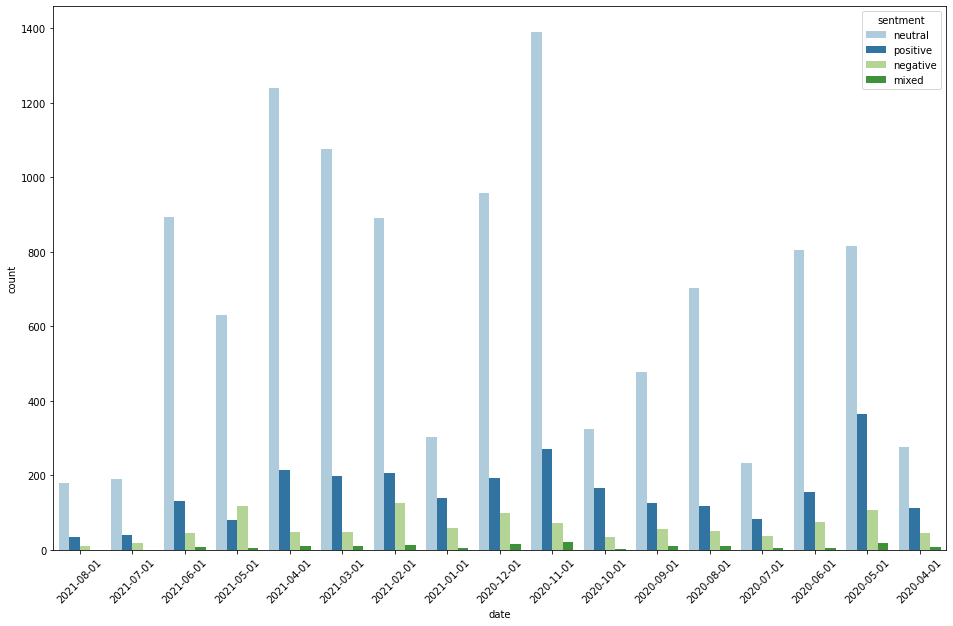

In [29]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = ndf, x ="date",hue = "sentment", palette = 'Paired')
plt.xticks(rotation=45)

## select non-human comments

In [30]:
## select not human data to explore
info_df = ndf.query('is_human != "T"')
print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 0 to 15198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  10561 non-null  datetime64[ns]
 1   message       10561 non-null  object        
 2   id            10561 non-null  object        
 3   Translate     10555 non-null  object        
 4   is_human      10561 non-null  object        
 5   sentment      10561 non-null  object        
 6   positive      10561 non-null  float64       
 7   neutral       10561 non-null  float64       
 8   negative      10561 non-null  float64       
 9   date          10561 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 907.6+ KB
None


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
0,2021-08-01,من فضلك عاوزة أسأل عن الكورس بتاع دكتور حنان ر...,1909076255920699_1909102692584722,"Please, I want to ask about dr. Hanan Radwan's...",F,neutral,0.05,0.92,0.03,2021-08-01
1,2021-08-01,ممكن معلومات عن المسابقة,1905738672921124_1905795872915404,Can I get information about the contest?,F,neutral,0.01,0.98,0.01,2021-08-01
2,2021-08-01,مبروووك,1905738672921124_1907514736076851,Congratulations,F,positive,0.57,0.39,0.04,2021-08-01
3,2021-08-01,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00,2021-08-01
4,2021-08-01,ممكن تفاصيل,1905738672921124_1906660966162228,Can I have details,F,neutral,0.01,0.98,0.01,2021-08-01


In [31]:
## select non natural comments
info_df = ndf.query('neutral <0.5')
info_df.reset_index(drop=True, inplace=True)
print(info_df.info())
info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_time  3848 non-null   datetime64[ns]
 1   message       3848 non-null   object        
 2   id            3848 non-null   object        
 3   Translate     3844 non-null   object        
 4   is_human      3848 non-null   object        
 5   sentment      3848 non-null   object        
 6   positive      3848 non-null   float64       
 7   neutral       3848 non-null   float64       
 8   negative      3848 non-null   float64       
 9   date          3848 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 300.8+ KB
None


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
0,2021-08-01,مبروووك,1905738672921124_1907514736076851,Congratulations,F,positive,0.57,0.39,0.04,2021-08-01
1,2021-08-01,مشاركه حلوة وناس فوق الممتازه كانو في المسابقه...,1905738672921124_1906692159492442,Nice participation and people above the excell...,F,positive,1.00,0.00,0.00,2021-08-01
2,2021-08-01,حاجة عظيمة,1905738672921124_1905753419586316,Great thing,F,positive,1.00,0.00,0.00,2021-08-01
3,2021-08-01,Nice course and thanks for the good service ❤️,1894442890717369_1902326146595710,Nice course and thanks for the good service ❤️,F,positive,1.00,0.00,0.00,2021-08-01
4,2021-08-01,هل الكورس دة ينفع للاطفال سن ١١ سنه,1894442890717369_1897570790404579,Is this course suitable for 11-year-olds?,F,positive,0.70,0.28,0.02,2021-08-01


In [32]:
info_df.positive.describe()

count    3848.000000
mean        0.633087
std         0.399411
min         0.000000
25%         0.200000
50%         0.830000
75%         0.990000
max         1.000000
Name: positive, dtype: float64

In [33]:
info_df.negative.describe()

count    3848.000000
mean        0.272497
std         0.388175
min         0.000000
25%         0.000000
50%         0.030000
75%         0.590000
max         1.000000
Name: negative, dtype: float64

Text(0, 0.5, 'value')

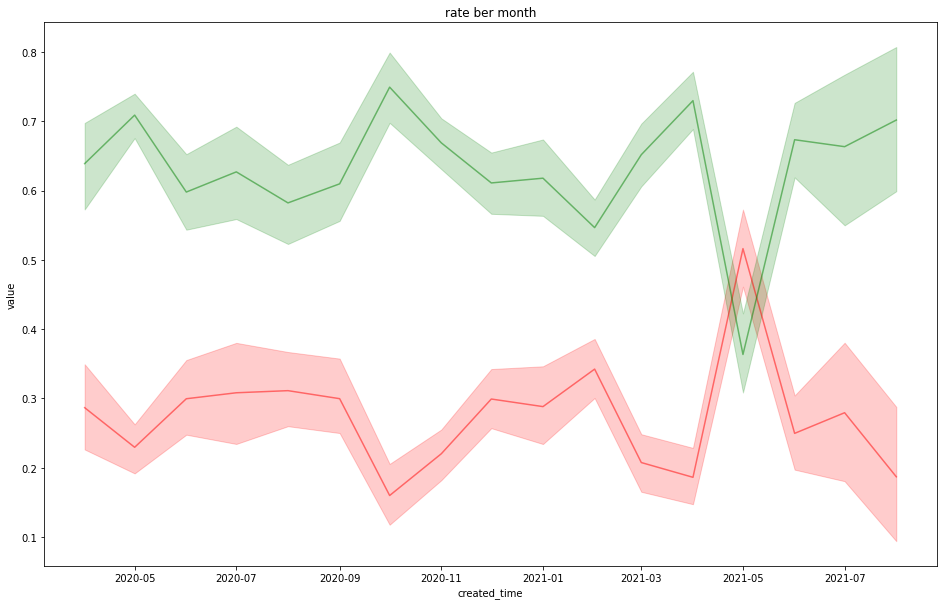

In [34]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=info_df, x="created_time", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=info_df, x="created_time", y="positive", color = "g", alpha = 0.5)
plt.title('rate ber month')
plt.ylabel("value")

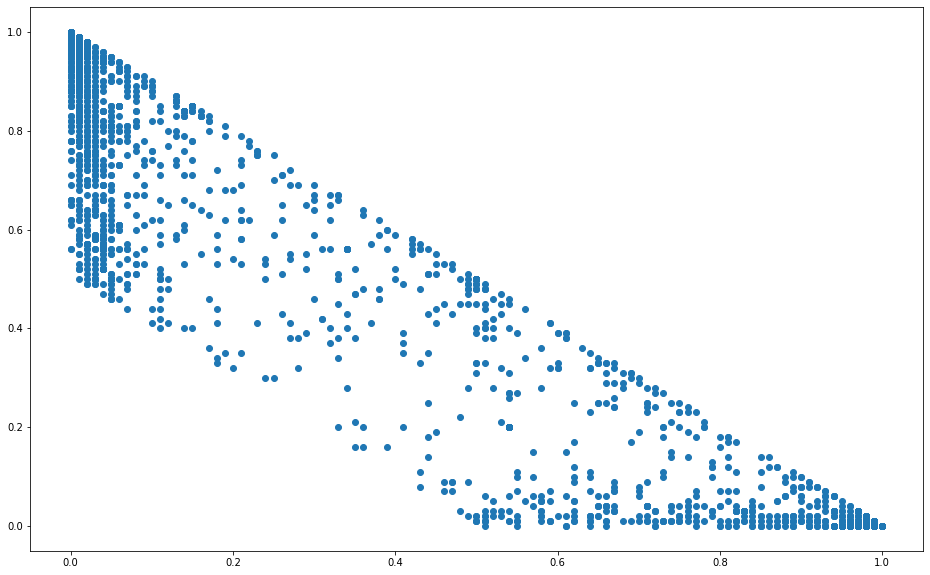

In [35]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = info_df["negative"], y =info_df["positive"] )

##### the corelation between positivity and negativity is linear :O 

#### lets check what happen in 5/2021

In [36]:
negative_df = info_df.query('date == datetime.date(2021, 5, 1) and sentment == "negative"')
negative_df.sample(10)

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
286,2021-05-01,#Palestine \n#GazaUnderAttack\n#القدس \n#حي_ال...,1820433051451687_1822337337927925,#Palestine,F,negative,0.04,0.31,0.65,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
270,2021-05-01,#GazaUnderAttack,1820433051451687_1823214361173556,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
306,2021-05-01,#GazaUnderAttack,1820433051451687_1821076068054052,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
322,2021-05-01,ما تفرجتش غير علي عمارة يعقوبيان و كان تمثيله ...,1818239751671017_1830518880443104,"I only saw the Jacobian building, and it was a...",F,negative,0.00,0.00,1.00,2021-05-01
282,2021-05-01,#GazaUnderAttack,1820433051451687_1822572187904440,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
300,2021-05-01,#GazaUnderAttack,1820433051451687_1821076264720699,#GazaUnderAttack,F,negative,0.03,0.14,0.83,2021-05-01
226,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979551397037,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
296,2021-05-01,#GazaUnderAttack\n#Palestine\n#savealsheikhjar...,1820433051451687_1821258244702501,#GazaUnderAttack,F,negative,0.03,0.30,0.67,2021-05-01


#### more than 50% of comment about "Gaza" and considerd as negative

In [37]:
## extract "Gaza commetns and fix the rate"

In [38]:
negative_df = negative_df[negative_df["message"].str.find("#GazaUnderAttack")!= -1]
negative_df

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,negative,0.01,0.03,0.96,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,negative,0.01,0.03,0.96,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,negative,0.03,0.15,0.82,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,negative,0.02,0.33,0.65,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,negative,0.01,0.03,0.96,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,negative,0.05,0.08,0.87,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,negative,0.05,0.08,0.87,2021-05-01


###### replace old and new values

In [39]:
n_negative = negative_df["positive"].copy()
n_positive =  negative_df["negative"].copy()

In [40]:
negative_df["negative"] = n_negative
negative_df["positive"] = n_positive
negative_df["sentment"] = "positive"
negative_df

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,positive,0.96,0.03,0.01,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,positive,0.96,0.03,0.01,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,positive,0.65,0.33,0.02,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,positive,0.96,0.03,0.01,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01


#### add new values in the orignal DF

In [41]:
info_df.loc[negative_df.index, :] = negative_df.copy()
info_df.loc[negative_df.index, :]

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
203,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979488063710,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
216,2021-05-01,انسخوه بالعلم ياجماعه قبل ميحذفوه \n\n#GazaUnd...,1820433051451687_1823951477766511,Copy it with the flag people before they Delet...,F,positive,0.96,0.03,0.01,2021-05-01
219,2021-05-01,انسخوه بالعلم قبل ميحذفوه \n\n#GazaUnderAttack...,1820433051451687_1822570237904635,Copy it with the flag before they Delete it,F,positive,0.96,0.03,0.01,2021-05-01
224,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979601397032,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
225,2021-05-01,أرجوكم لا تناموا الليلة، غزة تُجتاح. لا تناموا...,1820433051451687_1820979574730368,"Please don't sleep tonight, Gaza is sweeping. ...",F,positive,0.82,0.15,0.03,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
627,2021-05-01,#From_morocco🇲🇦🇵🇸\n#GazaUnderAttack,1778872888941037_1826008574227468,#From_morocco🇲🇦🇵🇸,F,positive,0.65,0.33,0.02,2021-05-01
628,2021-05-01,#IsraeliTerrorism\n\n#GazaUnderAttack\n\n#WeSt...,1778872888941037_1826008537560805,#IsraeliTerrorism,F,positive,0.96,0.03,0.01,2021-05-01
630,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482867613372,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01
631,2021-05-01,🇵🇸✌️🇲🇦\n#GazaUnderAttack \n#savesheikhjarrah,1778872888941037_1825482844280041,🇵🇸✌️🇲🇦,F,positive,0.87,0.08,0.05,2021-05-01


#### replot 

Text(0, 0.5, 'value')

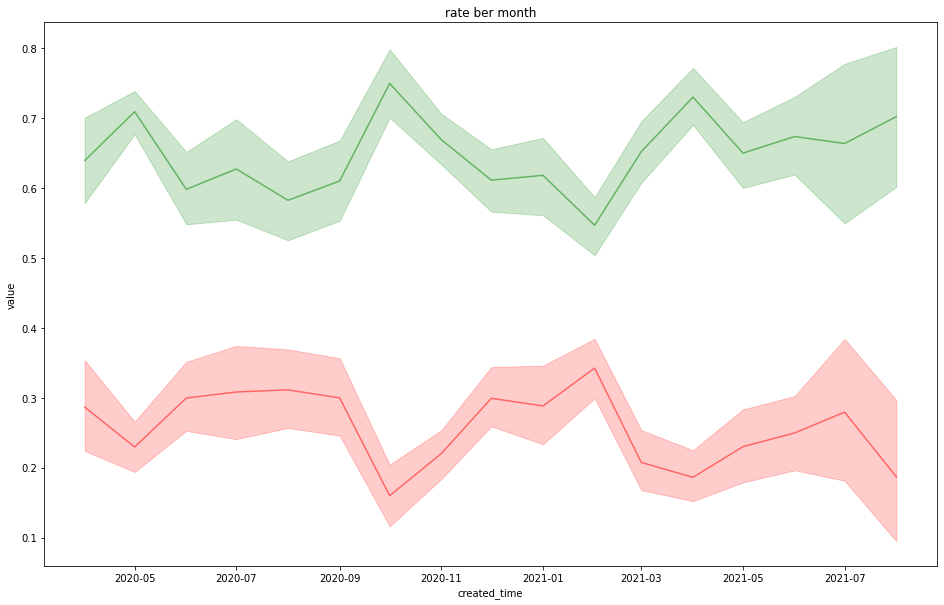

In [42]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=info_df, x="created_time", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=info_df, x="created_time", y="positive", color = "g", alpha = 0.5)
plt.title('rate ber month')
plt.ylabel("value")

## check distripution of rate

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'positive rate distripution')

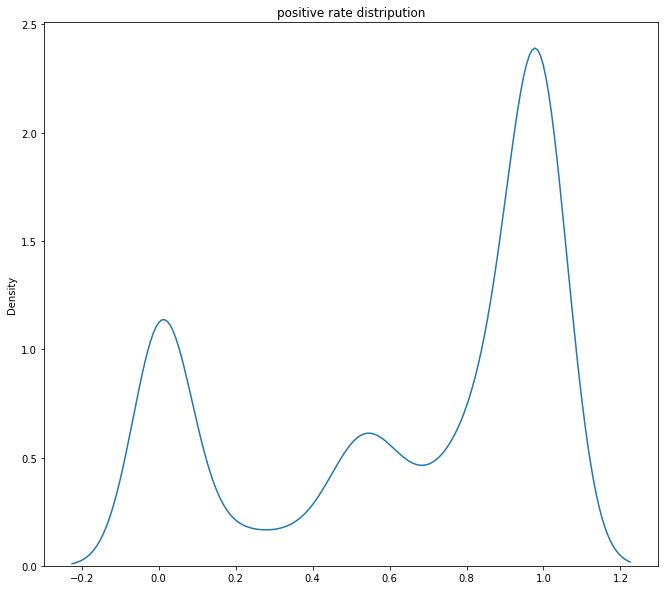

In [43]:
fig, plot = plt.subplots(figsize = (11,10))
plot = sns.distplot(x=info_df["positive"], hist = False )
plt.title('positive rate distripution')

c:\users\20812018100700\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


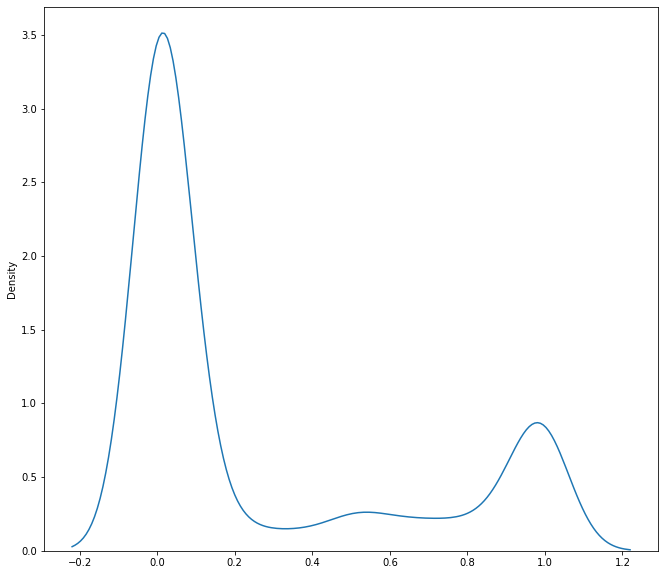

In [44]:
fig, plot = plt.subplots(figsize = (11,10))
plot = sns.distplot(x=info_df["negative"],hist =False )

In [45]:
info_df.is_human.unique()

array(['F', 'N'], dtype=object)

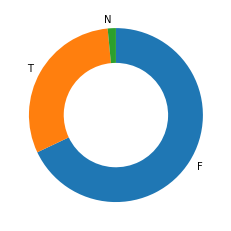

In [46]:
plt.pie(ndf.is_human.value_counts(), labels = ndf.is_human.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

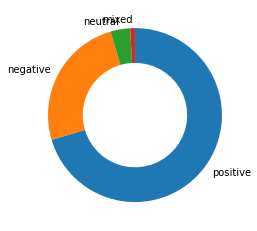

In [47]:
plt.pie(info_df.sentment.value_counts(), labels = info_df.sentment.unique(),
        startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});

In [48]:
colors = sns.color_palette()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-07-01'),
  Text(2, 0, '2021-06-01'),
  Text(3, 0, '2021-05-01'),
  Text(4, 0, '2021-04-01'),
  Text(5, 0, '2021-03-01'),
  Text(6, 0, '2021-02-01'),
  Text(7, 0, '2021-01-01'),
  Text(8, 0, '2020-12-01'),
  Text(9, 0, '2020-11-01'),
  Text(10, 0, '2020-10-01'),
  Text(11, 0, '2020-09-01'),
  Text(12, 0, '2020-08-01'),
  Text(13, 0, '2020-07-01'),
  Text(14, 0, '2020-06-01'),
  Text(15, 0, '2020-05-01'),
  Text(16, 0, '2020-04-01')])

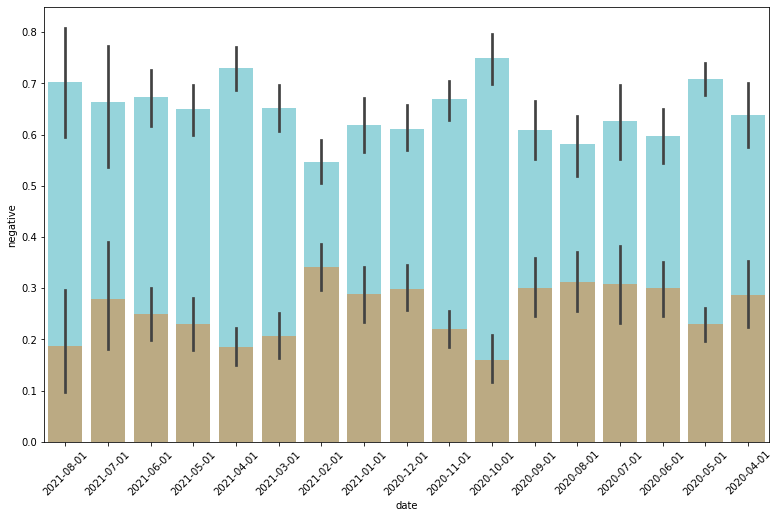

In [49]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = info_df, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = info_df, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-07-01'),
  Text(2, 0, '2021-06-01'),
  Text(3, 0, '2021-05-01'),
  Text(4, 0, '2021-04-01'),
  Text(5, 0, '2021-03-01'),
  Text(6, 0, '2021-02-01'),
  Text(7, 0, '2021-01-01'),
  Text(8, 0, '2020-12-01'),
  Text(9, 0, '2020-11-01'),
  Text(10, 0, '2020-10-01'),
  Text(11, 0, '2020-09-01'),
  Text(12, 0, '2020-08-01'),
  Text(13, 0, '2020-07-01'),
  Text(14, 0, '2020-06-01'),
  Text(15, 0, '2020-05-01'),
  Text(16, 0, '2020-04-01')])

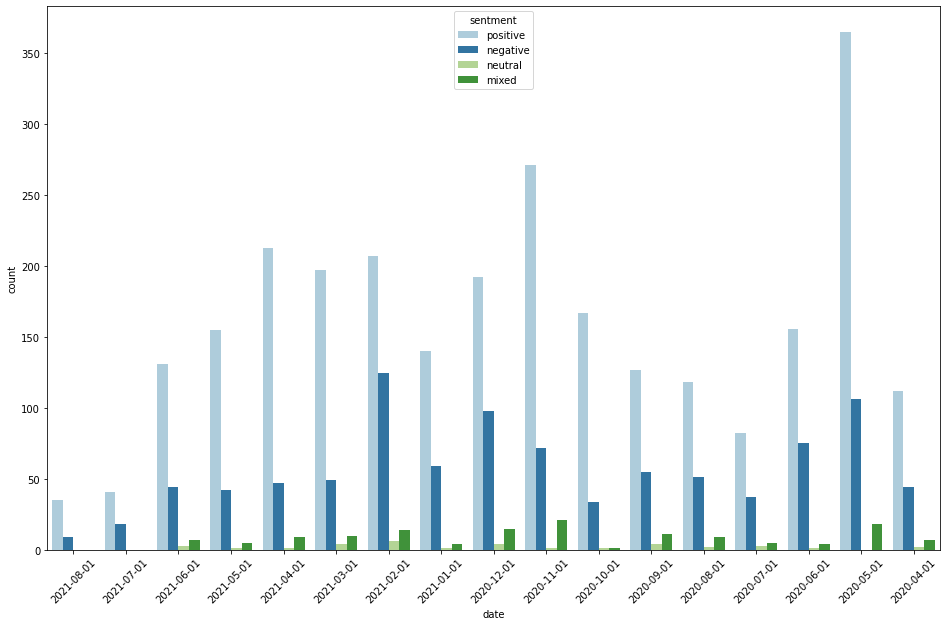

In [50]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = info_df, x ="date",hue = "sentment", palette = 'Paired')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2021-08-01'),
  Text(0, 1, '2021-07-01'),
  Text(0, 2, '2021-06-01'),
  Text(0, 3, '2021-05-01'),
  Text(0, 4, '2021-04-01'),
  Text(0, 5, '2021-03-01'),
  Text(0, 6, '2021-02-01'),
  Text(0, 7, '2021-01-01'),
  Text(0, 8, '2020-12-01'),
  Text(0, 9, '2020-11-01'),
  Text(0, 10, '2020-10-01'),
  Text(0, 11, '2020-09-01'),
  Text(0, 12, '2020-08-01'),
  Text(0, 13, '2020-07-01'),
  Text(0, 14, '2020-06-01'),
  Text(0, 15, '2020-05-01'),
  Text(0, 16, '2020-04-01')])

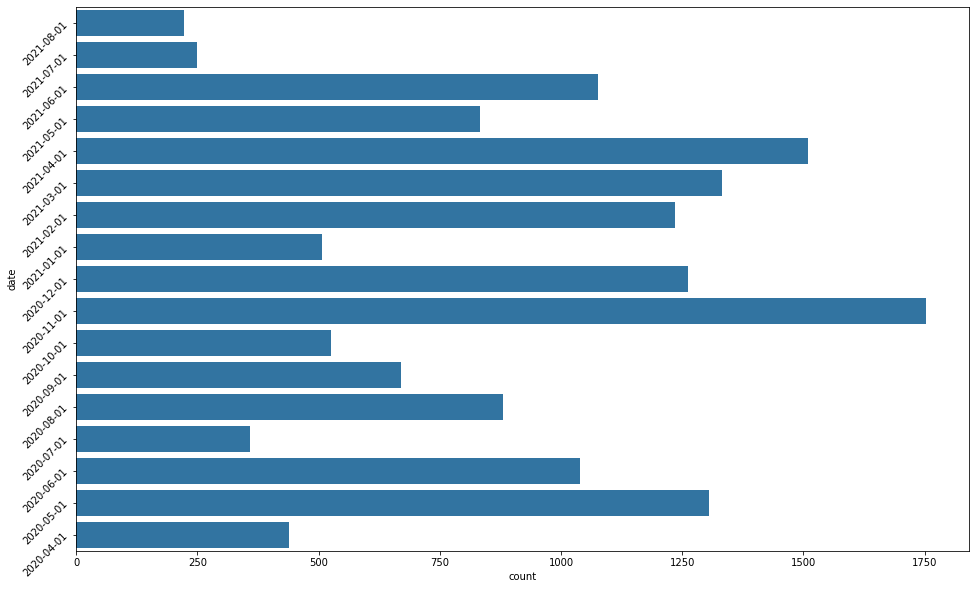

In [59]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = ndf,y = "date", color = colors[0])
plt.yticks(rotation=45)

In [53]:
ndf.query('sentment == "mixed"').sample()

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
6054,2021-01-01,اربع يجب ان يفني فيها الإنسان حياته\nرضا خالقه...,1736153323212994_1737503656411294,Four in which man must perish his life.,F,mixed,0.45,0.06,0.49,2021-01-01


In [57]:
ndf.query('sentment == "neutral"').sample()

,created_time,message,id,Translate,is_human,sentment,positive,neutral,negative,date
11963,2020-08-01,الشهاده معتمده من ايه؟,1578312028997125_1578868888941439,What is the certificate certified?,F,neutral,0.04,0.95,0.01,2020-08-01
